# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

In [3]:
for i, val in enumerate(cities):
    print (i,  val)

0 arraial do cabo
1 rikitea
2 belushya guba
3 ugoofaaru
4 mehamn
5 yellowknife
6 utiroa
7 fort nelson
8 oriximina
9 coahuayana
10 vaitupu
11 mataura
12 hilo
13 san cristobal
14 faanui
15 tsihombe
16 albany
17 victoria
18 nouadhibou
19 pevek
20 hermanus
21 preobrazheniye
22 jamestown
23 cherskiy
24 okhotsk
25 bantogon
26 dikson
27 margate
28 sao filipe
29 thompson
30 kapit
31 ushuaia
32 chara
33 mar del plata
34 la paz
35 qaanaaq
36 karasuk
37 tomioka
38 chuari khas
39 tumannyy
40 tasiilaq
41 busselton
42 chengde
43 salalah
44 yulara
45 souillac
46 kailua
47 amderma
48 glasgow
49 barra do garcas
50 butaritari
51 atuona
52 atar
53 makat
54 dingle
55 strezhevoy
56 bluff
57 mys shmidta
58 hualmay
59 gushi
60 tairua
61 moulins
62 vaini
63 tiksi
64 ponta do sol
65 hithadhoo
66 port alfred
67 puerto palomas
68 kota kinabalu
69 hadejia
70 namibe
71 anito
72 tallahassee
73 punta arenas
74 manicore
75 beloha
76 hobart
77 carutapera
78 geraldton
79 castro
80 vila franca do campo
81 kazalinsk
82 k

In [4]:
unique_city = []
cloudy = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

In [5]:
init_count = 0
add_count = 0

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#API call per city for weather check


    # setup url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
print('Data Retrieval')
print('--------------')


Data Retrieval
--------------


In [8]:

for city in cities:
    # add city url
    city_url = url + "&q=" + city
    print(city_url)

    response = requests.get(city_url).json()
    
    try:
        cloudy.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        unique_city.append(response['name'])
    
    except(KeyError):
        print("City not found!")

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')
  

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=belushya guba
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=utiroa
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imper

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=manicore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=kazalinsk
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=wajima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=gambela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=college
ht

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=lyantonde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=ca mau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=oblivskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=dabakala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=ave

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=afmadu
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=sentyabrskiy
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=wawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673e

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=gunjur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=meyungs
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=ust-kut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=santa eulalia del rio
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=pocos de caldas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=staroutkinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=honningsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=state college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a7058

City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=galgani
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=thessalon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=cozumel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=kushiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=cascais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=toba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=takestan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=tandil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=haflong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=daniel flores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=karambakkudi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=palm harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
len(cloudy)

593

In [10]:
city_df = pd.DataFrame({"City": unique_city, 
                        "Cloudiness": cloudy, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": temp,
                        "Wind Speed": wind
                                         })

city_df = city_df.rename_axis('City ID')

city_df.head(50)


City  Cloudiness Country        Date  Humidity      Lat  \
City ID                                                                        
0         Arraial do Cabo           0      BR  1611865195        57 -22.9661   
1                 Rikitea          91      PF  1611865453        69 -23.1203   
2               Ugoofaaru           0      MV  1611865453        60   5.6667   
3                  Mehamn          75      NO  1611865454        68  71.0357   
4             Yellowknife          75      CA  1611865349        69  62.4560   
5             Fort Nelson          20      CA  1611865454        77  58.8053   
6               Oriximiná          81      BR  1611865414        56  -1.7656   
7        Coahuayana Viejo          40      MX  1611865224        48  18.7333   
8                 Mataura          92      NZ  1611865454        80 -46.1927   
9                    Hilo          75      US  1611865389        69  19.7297   
10          San Cristobal          20      VE  1611865355        54   7.7669   
11                 Faanui          84      PF  1611865222        68 -16.4833   
12                 Albany          36      US  1611865455        47  42.6001   
13              Hong Kong          34      HK  1611865245        56  22.2855   
14             Nouadhibou           0      MR  1611865455        56  20.9310   
15                  Pevek          28      RU  1611865455        85  69.7008   
16               Hermanus           4      ZA  1611865455        85 -34.4187   
17         Preobrazheniye         100      RU  1611865456        85  42.9019   
18              Jamestown          90      US  1611865165        79  42.0970   
19               Cherskiy         100      RU  1611865456        85  68.7500   
20                Okhotsk           0      RU  1611865456        78  59.3833   
21               Bantogon          98      PH  1611865456        67   6.5333   
22                 Dikson          65      RU  1611865456        79  73.5069   
23                Margate         100      GB  1611865456        86  51.3813   
24             São Filipe           0      CV  1611865456        66  14.8961   
25               Thompson          75      CA  1611865456        84  55.7435   
26                  Kapit         100      MY  1611865457        95   2.0167   
27                Ushuaia          40      AR  1611865261        71 -54.8000   
28                  Chara          99      RU  1611865457        76  56.9064   
29          Mar del Plata          75      AR  1611865457        47 -38.0023   
30                 La Paz          28      BO  1611865457        31 -16.5000   
31                Qaanaaq           0      GL  1611865457        67  77.4840   
32                Karasuk         100      RU  1611865457        96  53.7377   
33                Tomioka          30      JP  1611865457        98  36.2500   
34            Chuāri Khās           0      IN  1611865458        53  32.4333   
35               Tasiilaq          90      GL  1611865175        86  65.6145   
36              Busselton           0      AU  1611865458        77 -33.6500   
37                Chengde           0      CN  1611865458        71  40.9725   
38                Salalah          40      OM  1611865458        60  17.0151   
39                 Yulara          40      AU  1611865458        45 -25.2406   
40               Souillac          75      MU  1611865458        94 -20.5167   
41                 Kailua          75      US  1611865459        73  21.4022   
42                Glasgow          90      GB  1611865215       100  55.8652   
43        Barra do Garças          40      BR  1611865459        49 -15.8900   
44             Butaritari          93      KI  1611865459        80   3.0707   
45                 Atuona          16      PF  1611865459        80  -9.8000   
46                   Atar           0      MR  1611865459        20  20.5169   
47                  Makat         100      KZ  1611865459        85  47.6469   
48                 Di

In [27]:
city_df.to_csv("city_df.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Per CSV review, no cities have humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

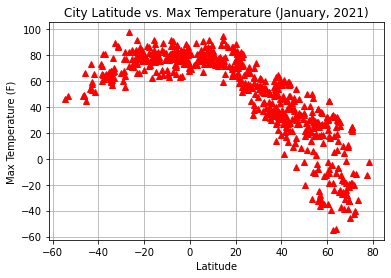

In [28]:
fig,ax = plt.subplots()
ax.grid()
# line,=plt.plot([0,1])
plt.plot(lat, temp, 'r^')
plt.title('City Latitude vs. Max Temperature (January, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

This graph is displaying the correlation between the city's latitude and the maximum temperature for January 25, 2021.  The cities at 0 latitude (the Earth's equator) have the maximum temperature.  The temperature decreases as the city moves further from the equator.

## Latitude vs. Humidity Plot

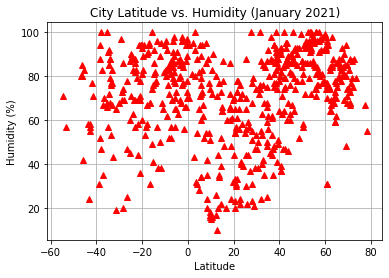

In [13]:
fig,ax = plt.subplots()
ax.grid()
plt.plot(lat, humidity, 'r^')
plt.title('City Latitude vs. Humidity (January 2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

This graph is displaying the correlation between the city's latitude and the humidity for January 25, 2021.  Humidity is broad across cities in relation to the equator.  From this visualization, the user cannot see correlation in relation to the equator and city humidity.

## Latitude vs. Cloudiness Plot

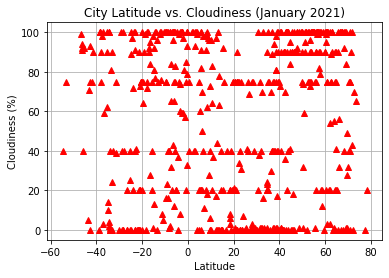

In [14]:
fig,ax = plt.subplots()
ax.grid()
plt.plot(lat, cloudy, 'r^')
plt.title('City Latitude vs. Cloudiness (January 2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The majority of cities trends toward 100% or 0% cloudy. There is no correlation to cloudiness related to the equator.

## Latitude vs. Wind Speed Plot

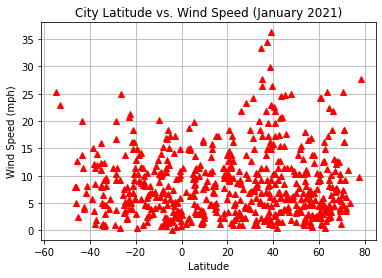

In [15]:
fig,ax = plt.subplots()
ax.grid()
plt.plot(lat, wind, 'r^')
plt.title('City Latitude vs. Wind Speed (January 2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

The majority of cities have a wind speed of 20 mph and below.  The distance from the equator does not impact wind speed.

## Linear Regression

In [16]:
city_df = pd.DataFrame({"City": unique_city, 
                        "Cloudiness": cloudy, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": temp,
                        "Wind Speed": wind
                                         })

city_df = city_df.rename_axis('City ID')

city_df.head(50)


City  Cloudiness Country        Date  Humidity      Lat  \
City ID                                                                        
0         Arraial do Cabo           0      BR  1611865195        57 -22.9661   
1                 Rikitea          91      PF  1611865453        69 -23.1203   
2               Ugoofaaru           0      MV  1611865453        60   5.6667   
3                  Mehamn          75      NO  1611865454        68  71.0357   
4             Yellowknife          75      CA  1611865349        69  62.4560   
5             Fort Nelson          20      CA  1611865454        77  58.8053   
6               Oriximiná          81      BR  1611865414        56  -1.7656   
7        Coahuayana Viejo          40      MX  1611865224        48  18.7333   
8                 Mataura          92      NZ  1611865454        80 -46.1927   
9                    Hilo          75      US  1611865389        69  19.7297   
10          San Cristobal          20      VE  1611865355        54   7.7669   
11                 Faanui          84      PF  1611865222        68 -16.4833   
12                 Albany          36      US  1611865455        47  42.6001   
13              Hong Kong          34      HK  1611865245        56  22.2855   
14             Nouadhibou           0      MR  1611865455        56  20.9310   
15                  Pevek          28      RU  1611865455        85  69.7008   
16               Hermanus           4      ZA  1611865455        85 -34.4187   
17         Preobrazheniye         100      RU  1611865456        85  42.9019   
18              Jamestown          90      US  1611865165        79  42.0970   
19               Cherskiy         100      RU  1611865456        85  68.7500   
20                Okhotsk           0      RU  1611865456        78  59.3833   
21               Bantogon          98      PH  1611865456        67   6.5333   
22                 Dikson          65      RU  1611865456        79  73.5069   
23                Margate         100      GB  1611865456        86  51.3813   
24             São Filipe           0      CV  1611865456        66  14.8961   
25               Thompson          75      CA  1611865456        84  55.7435   
26                  Kapit         100      MY  1611865457        95   2.0167   
27                Ushuaia          40      AR  1611865261        71 -54.8000   
28                  Chara          99      RU  1611865457        76  56.9064   
29          Mar del Plata          75      AR  1611865457        47 -38.0023   
30                 La Paz          28      BO  1611865457        31 -16.5000   
31                Qaanaaq           0      GL  1611865457        67  77.4840   
32                Karasuk         100      RU  1611865457        96  53.7377   
33                Tomioka          30      JP  1611865457        98  36.2500   
34            Chuāri Khās           0      IN  1611865458        53  32.4333   
35               Tasiilaq          90      GL  1611865175        86  65.6145   
36              Busselton           0      AU  1611865458        77 -33.6500   
37                Chengde           0      CN  1611865458        71  40.9725   
38                Salalah          40      OM  1611865458        60  17.0151   
39                 Yulara          40      AU  1611865458        45 -25.2406   
40               Souillac          75      MU  1611865458        94 -20.5167   
41                 Kailua          75      US  1611865459        73  21.4022   
42                Glasgow          90      GB  1611865215       100  55.8652   
43        Barra do Garças          40      BR  1611865459        49 -15.8900   
44             Butaritari          93      KI  1611865459        80   3.0707   
45                 Atuona          16      PF  1611865459        80  -9.8000   
46                   Atar           0      MR  1611865459        20  20.5169   
47                  Makat         100      KZ  1611865459        85  47.6469   
48                 Di

In [17]:
north = city_df.loc[city_df['Lat'] >=0]
south = city_df.loc[city_df['Lat'] <0]
type(city_df)

pandas.core.frame.DataFrame

In [18]:
len(north['Lat']), len(temp)

(400, 593)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

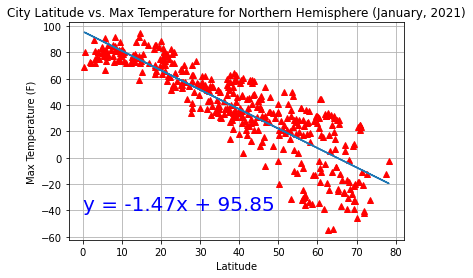

In [29]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( north['Lat'], north['Max Temp'])

plt.plot( north['Lat'], north['Max Temp'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(0,-40),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  north['Lat']] 

#colors slope line
plt.plot( north['Lat'], regress_values)
#labels chart
plt.title('City Latitude vs. Max Temperature for Northern Hemisphere (January, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

This chart shows the correlation between city temperature and distance to/from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

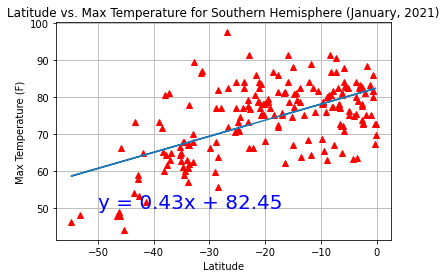

In [31]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( south['Lat'], south['Max Temp'])

plt.plot( south['Lat'], south['Max Temp'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(-50,50),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  south['Lat']] 

#colors slope line
plt.plot( south['Lat'], regress_values)
#labels chart
plt.title('Latitude vs. Max Temperature for Southern Hemisphere (January, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

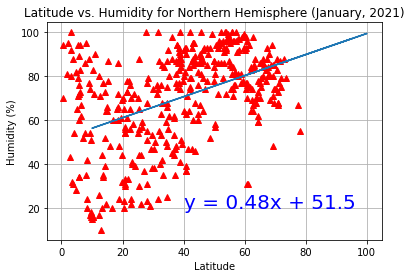

In [32]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( north['Lat'], north['Humidity'])

plt.plot( north['Lat'], north['Humidity'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(40,20),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  north['Humidity']] 

#colors slope line
plt.plot( north['Humidity'], regress_values)
#labels chart
plt.title('Latitude vs. Humidity for Northern Hemisphere (January, 2021)')
plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

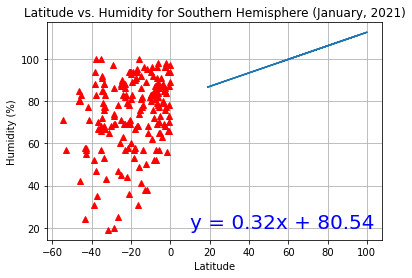

In [34]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( south['Lat'], south['Humidity'])

plt.plot( south['Lat'], south['Humidity'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(10,20),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  south['Humidity']] 

#colors slope line
plt.plot( south['Humidity'], regress_values)
#labels chart
plt.title('Latitude vs. Humidity for Southern Hemisphere (January, 2021)')
plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

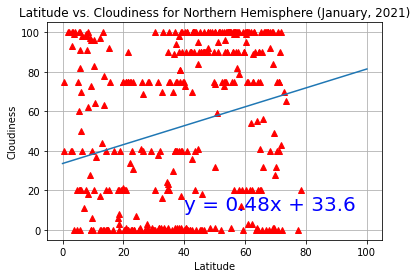

In [35]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( north['Lat'], north['Cloudiness'])

plt.plot( north['Lat'], north['Cloudiness'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(40,10),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  north['Cloudiness']] 

#colors slope line
plt.plot( north['Cloudiness'], regress_values)
#labels chart
plt.title('Latitude vs. Cloudiness for Northern Hemisphere (January, 2021)')
plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

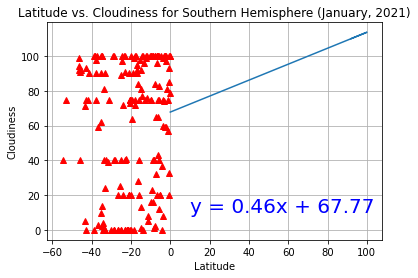

In [36]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( south['Lat'], south['Cloudiness'])

plt.plot( south['Lat'], south['Cloudiness'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(10,10),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  south['Cloudiness']] 

#colors slope line
plt.plot( south['Cloudiness'], regress_values)
#labels chart
plt.title('Latitude vs. Cloudiness for Southern Hemisphere (January, 2021)')
plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

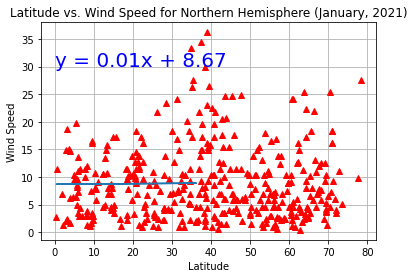

In [37]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( north['Lat'], north['Wind Speed'])

plt.plot( north['Lat'], north['Wind Speed'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(0,30),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  north['Wind Speed']] 

#colors slope line
plt.plot( north['Wind Speed'], regress_values)
#labels chart
plt.title('Latitude vs. Wind Speed for Northern Hemisphere (January, 2021)')
plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

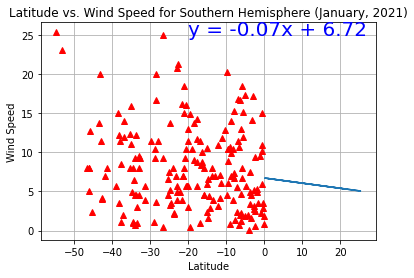

In [38]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( south['Lat'], south['Wind Speed'])

plt.plot( south['Lat'], south['Wind Speed'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(-20,25),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  south['Wind Speed']] 

#colors slope line
plt.plot( south['Wind Speed'], regress_values)
#labels chart
plt.title('Latitude vs. Wind Speed for Southern Hemisphere (January, 2021)')
plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

plt.show()